# Explore here

In [8]:
import pandas as pd

In [9]:
total_data= pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
total_data.shape

(1338, 7)

In [11]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


La base de datos cuenta con 1338 entradas, filas, y 7 columnas, variables. 
Contamos con datos númericos(4 variables) y con datos objeto (3 variables).
No detectamos valores nulos.

DUPLICADOS

In [12]:
total_data.duplicated().sum()

np.int64(1)

Contamos con un duplicado pero al no tener id de los clientes no podemos saber si se trata o no de un valor realmente duplicado.

INFORMACIÓN IRRELEVANTE

In [13]:
total_data.drop(["region"], axis = 1, inplace = True)
total_data.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


Eliminamos la variable "region" por no tener relevacia en la resolución de nuestro problema.

ANÁLISIS DE VARIABLES CATEGORICAS

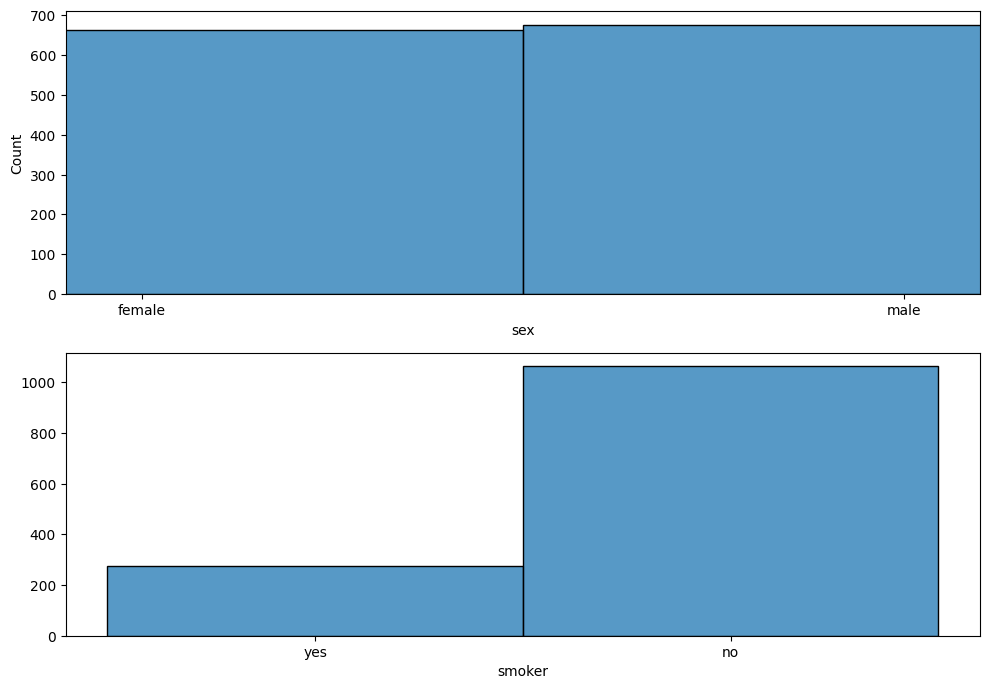

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 1, figsize = (10, 7))

# Create a multiple histogram
sns.histplot(ax = axis[0], data = total_data, x = "sex").set_xlim(-0.1, 1.1)
sns.histplot(ax = axis[1], data = total_data, x = "smoker").set(ylabel = None)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [25]:
total_data.groupby("sex")["sex"].count()

sex
female    662
male      676
Name: sex, dtype: int64

In [27]:
total_data.groupby("smoker")["smoker"].count()

smoker
no     1064
yes     274
Name: smoker, dtype: int64

Apreciamos que el sexo de los clientes es prácticamente equitativo en su distribución.
La gran mayoria de los clientes no son fumadores.

ANÁLISIS DE VARIABLES NUMÉRICAS

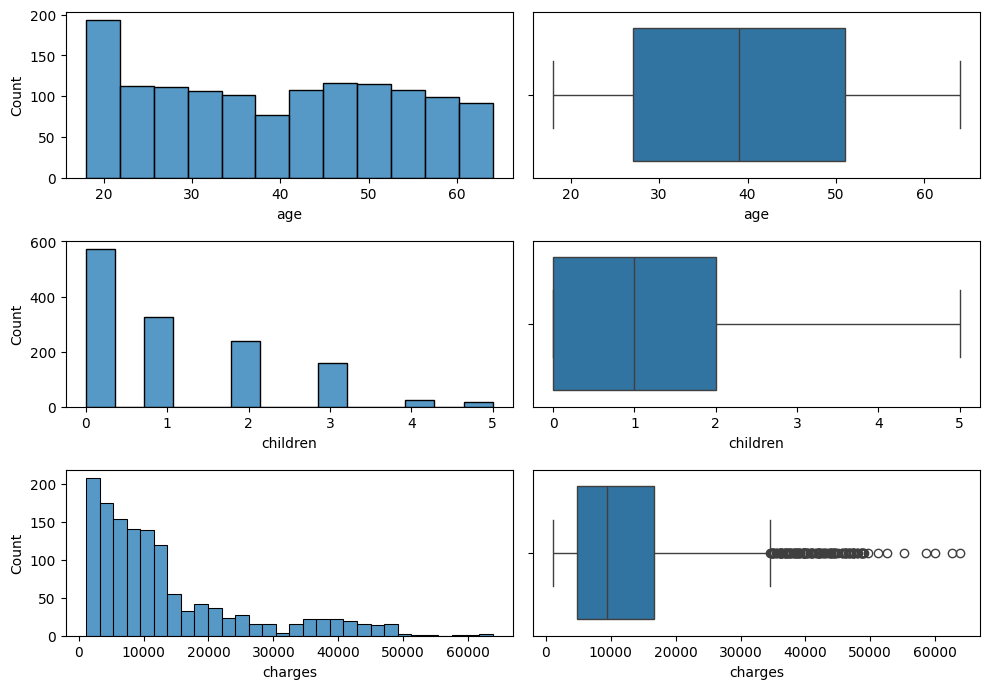

In [43]:
fig, axis = plt.subplots(3, 2, figsize = (10, 7))

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = total_data, x = "age").set(xlabel = "age")
sns.boxplot(ax = axis[0, 1], data = total_data, x = "age")
sns.histplot(ax = axis[1, 0], data = total_data, x = "children").set(xlabel = "children")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "children")
sns.histplot(ax = axis[2, 0], data = total_data, x = "charges").set(xlabel = "charges")
sns.boxplot(ax = axis[2, 1], data = total_data, x = "charges")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()